In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = 3
y = np.sqrt(x)
print(y)

1.7320508075688772


In [4]:
# Finite Element Modeling with Abaqus and Python for Thermal and
# Stress Analysis
# (C)  2017-2020, Petr Krysl
"""
Concrete column with hydration heat and zero temperature on the boundary.
Numerical solution. This process is shown step-by-step, which means that 
the listing is much longer than it needs to be. Later we use loops, which 
makes the code much more succinct.
"""

import math
from numpy import array as array
from numpy import zeros as zeros
from numpy import ones as ones
from numpy import arange as arange
from numpy import dot as dot
from numpy import linalg as linalg

# These are the constants in the problem, k is kappa
a = 2.5 # radius on the columnthe
dy = a/2*math.sin(15./180*math.pi)
dx = a/2*math.cos(15./180*math.pi)
Q = 4.5 # internal heat generation rate
k = 1.8 # thermal conductivity
Dz = 1.0 # thickness of the slice

#  Gradients of the basis functions wrt the parametric coords
gradNpar = array([[-1, -1], [1, 0], [0, 1]])
#Coordinates of the nodes. Node 1 in first row, and so on.
xall = array([[0, 0], [dx, -dy], [dx, dy], [2*dx, -2*dy], [2*dx, 2*dy]])
# Numbers of the degrees of freedom
dof = array([3, 1, 2, 5, 4])
# Number of free degrees of freedom
N_f = 3
# Number of all degrees of freedom
N = 5

# Global conductivity matrix and heat load vector.
K = zeros((N_f, N))
L = zeros((N_f,)).reshape(N_f, 1)

#First element
conn = array([1, 2, 3]) # The definition of the element, listing its nodes
zconn = conn - 1 # zero-based node indexes
x = xall[zconn, :]# The coordinates  of the three nodes
print('x = ', x)
J = dot(x.T, gradNpar) # Compute the Jacobian matrix
Se = linalg.det(J)/2 # The area of the triangle
print('Se = ', Se)
# Compute the gradient with respect to X, Y
gradN = dot(gradNpar, linalg.inv(J))
print('gradN = ', gradN)
# Some terms of the conductivity matrix
print(Se*dot(gradN[0, :], gradN[0, :].T)*k*Dz)
print(Se*dot(gradN[0, :], gradN[1, :].T)*k*Dz)
# The entire elementwise conductivity matrix
Ke1 = (Se*dot(gradN, gradN.T)*k*Dz)
print('Ke1 = ', Ke1)
# Element degree-of-freedom array,  converted to zero base
zedof = array(dof[zconn])-1
# Assemble contribution from element 1
for ro  in arange(len(zedof)):
    for co  in arange(len(zedof)):
        K[zedof[ro], zedof[co]] = K[zedof[ro], zedof[co]] + Ke1[ro, co]

print('K = ', K)
# Compute heat load from element 1
LQe1 = Se*Q*Dz/3*ones((3,)).reshape(3, 1)
for ro  in arange(len(zedof)):
    L[zedof[ro]] = L[zedof[ro]] + LQe1[ro]

##Second element
conn = array([2, 4, 5])
zconn = conn - 1 # zero-based node indexes
x = xall[zconn, :]# The coordinates  of the three nodes
J = dot(x.T, gradNpar) # Compute the Jacobian matrix
Se = linalg.det(J)/2 # The area of the triangle
# Compute the gradient with respect to X, Y
gradN = dot(gradNpar, linalg.inv(J))
# The entire elementwise conductivity matrix
Ke2 = (Se*dot(gradN, gradN.T)*k*Dz)
print(Ke2)
# Element degree-of-freedom array,  converted to zero base
zedof = array(dof[zconn])-1
# Assemble contribution from element 2
for ro  in arange(len(zedof)):
    for co  in arange(len(zedof)):
        if (zedof[ro] < N_f):
            K[zedof[ro], zedof[co]] = K[zedof[ro], zedof[co]] + Ke2[ro, co]

print(K)
# Compute heat load from element 2
LQe2 = Se*Q*Dz/3*ones((3,)).reshape(3, 1)
for ro  in arange(len(zedof)):
    if (zedof[ro] < N_f):
        L[zedof[ro]] = L[zedof[ro]] + LQe2[ro]

##Third element
conn = array([2, 5, 3])
zconn = conn - 1 # zero-based node indexes
x = xall[zconn, :]# The coordinates  of the three nodes
J = dot(x.T, gradNpar) # Compute the Jacobian matrix
Se = linalg.det(J)/2 # The area of the triangle
# Compute the gradient with respect to X, Y
gradN = dot(gradNpar, linalg.inv(J))
# The entire elementwise conductivity matrix
Ke3 = (Se*dot(gradN, gradN.T)*k*Dz)
# Element degree-of-freedom array,  converted to zero base
zedof = array(dof[zconn])-1
# Assemble contribution from element 3
for ro  in arange(len(zedof)):
    for co  in arange(len(zedof)):
        if (zedof[ro] < N_f):
            K[zedof[ro], zedof[co]] = K[zedof[ro], zedof[co]] + Ke3[ro, co]

print(K)
# Compute heat load from element 3
LQe3 = Se*Q*Dz/3*ones((3,)).reshape(3, 1)
for ro  in arange(len(zedof)):
    if (zedof[ro] < N_f):
        L[zedof[ro]] = L[zedof[ro]] + LQe3[ro]

print(L)

# Solution:
T = linalg.solve(K[0:N_f, 0:N_f], L)
print('Solution T = ', T)

x =  [[ 0.          0.        ]
 [ 1.20740728 -0.32352381]
 [ 1.20740728  0.32352381]]
Se =  0.39062499999999994
gradN =  [[-0.82822094  0.        ]
 [ 0.41411047 -1.54548132]
 [ 0.41411047  1.54548132]]
0.4823085463760209
-0.24115427318801044
Ke1 =  [[ 0.48230855 -0.24115427 -0.24115427]
 [-0.24115427  1.8        -1.55884573]
 [-0.24115427 -1.55884573  1.8       ]]
K =  [[ 1.8        -1.55884573 -0.24115427  0.          0.        ]
 [-1.55884573  1.8        -0.24115427  0.          0.        ]
 [-0.24115427 -0.24115427  0.48230855  0.          0.        ]]
[[ 0.96461709 -0.72346282 -0.24115427]
 [-0.72346282  1.38230855 -0.65884573]
 [-0.24115427 -0.65884573  0.9       ]]
[[ 2.76461709 -1.55884573 -0.24115427 -0.24115427 -0.72346282]
 [-1.55884573  1.8        -0.24115427  0.          0.        ]
 [-0.24115427 -0.24115427  0.48230855  0.          0.        ]]
[[ 4.56461709e+00 -3.60000000e+00 -2.41154273e-01  2.77555756e-17
  -7.23462820e-01]
 [-3.60000000e+00  4.56461709e+00 -2.411542

In [5]:
A = [[3.46 , -1.94] , [6 , 4.08]]
print(A)
print(np.linalg.det(A))

[[3.46, -1.94], [6, 4.08]]
25.75679999999999


In [7]:
x = np.array([[-1,-1],[1,0],[0,1]])
J = np.array([[-1.92,-6],[5.4,3.46]])
m = linalg.inv(J)
N = np.matmul(x,m)
print(N)
T = np.array([20,15,-15])
N = np.transpose(N)
print(N)
g = np.matmul(N,T)
print(g)
K = [[-0.2,0],[0,-0.2]]
print(np.matmul(K,g))




[[ 0.07531992 -0.15840477]
 [ 0.13433346  0.23294819]
 [-0.20965337 -0.07454342]]
[[ 0.07531992  0.13433346 -0.20965337]
 [-0.15840477  0.23294819 -0.07454342]]
[6.66620077 1.44427879]
[-1.33324015 -0.28885576]


[[ 4.56461709e+00 -3.60000000e+00 -2.41154273e-01  5.55111512e-17
  -7.23462820e-01]
 [-3.60000000e+00  4.56461709e+00 -2.41154273e-01 -7.23462820e-01
   0.00000000e+00]
 [-2.41154273e-01 -2.41154273e-01  4.82308546e-01  0.00000000e+00
   0.00000000e+00]
 [ 5.55111512e-17 -7.23462820e-01  0.00000000e+00  1.38230855e+00
  -6.58845727e-01]
 [-7.23462820e-01  0.00000000e+00  0.00000000e+00 -6.58845727e-01
   1.38230855e+00]]
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         2.15682538 1.07841269]
 [0.         0.         0.         1.07841269 2.15682538]]
[[2.34375  ]
 [1.171875 ]
 [0.5859375]
 [1.7578125]
 [1.171875 ]]
T= [[3.98611551]
 [3.85656562]
 [5.13620085]
 [1.16555779]
 [1.00777532]]
Temperatures at the nodes
Node 1 T= [5.13620085]
Node 2 T= [3.98611551]
Node 3 T= [3.85656562]
Node 4 T= [1.00777532]
Node 5 T= [1.16555779]


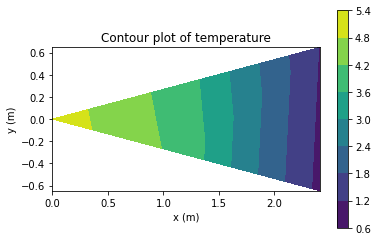

In [1]:
import math
from numpy import array as array
from numpy import zeros as zeros
from numpy import ones as ones
from numpy import arange as arange
from numpy import dot as dot
from numpy import linalg as linalg
from numpy import vstack  as vstack
from numpy import diff as diff
import matplotlib.pyplot as plt

# These are the input constants in the problem:
a = 2.5  # radius of the column cross-section
dy = a / 2 * math.sin(15. / 180 * math.pi)
dx = a / 2 * math.cos(15. / 180 * math.pi)
Q = 4.5  # internal heat generation rate
k = 1.8  # thermal conductivity
Dz = 1.0  # thickness of the slice
h = 5.0  # surface heat transfer coefficient
Ta = 0.0  # ambient temperature (freezing water)

# Coordinates of nodes
x = array([[0, 0], [dx, -dy], [dx, dy], [2 * dx, -2 * dy], [2 * dx, 2 * dy]])
N = 5  # total number of nodes
N_f = 5  # total number of free degrees of freedom
# Mapping from nodes to  degrees of freedom
node2dof = array([3, 1, 2, 5, 4])
T = zeros(N).reshape(N, 1) # Vector of temperatures at all degrees of freedom

# gradients of the basis functions with respect to the param. coordinates
gradNpar = array([[-1, -1], [1, 0], [0, 1]])

# Connectivity of the mesh: interior mesh
conn = array([[1, 2, 3], [2, 4, 5], [2, 5, 3]])
# boundary mesh
connbdry = array([[4, 5]])

K = zeros((N_f, N))  # allocate the global conductivity matrix
L = zeros((N_f, 1))  # allocate the global heat loads vector

# Loop over the triangles in the mesh
kappa = k
zconn = conn - 1
for j  in arange(zconn.shape[0]):
    J = dot(x[zconn[j, :], :].T, gradNpar) # compute the Jacobian matrix
    gradN = dot(gradNpar, linalg.inv(J)) # compute the x,y grads of the b. funcs
    Ke = (kappa*Dz*linalg.det(J)/2)*dot(gradN, gradN.T) # elementwise matrix
    # Element degree-of-freedom array,  converted to zero base
    zedof = array(node2dof[zconn[j, :]])-1
    # Assemble elementwise conductivity matrix
    for ro  in arange(len(zedof)):
        for co  in arange(len(zedof)):
            if (zedof[ro] < N_f):
                K[zedof[ro], zedof[co]] = K[zedof[ro], zedof[co]] + Ke[ro, co]
    LQe = linalg.det(J)/2*Q*Dz/3*ones((3, 1))
    for ro  in arange(len(zedof)):
        if (zedof[ro] < N_f):
            L[zedof[ro]] = L[zedof[ro]] + LQe[ro]

# Calculations for the  convection boundary condition
H = zeros((N_f, N))  # allocate the global film-condition matrix
zconn = connbdry - 1
for j in arange(zconn.shape[0]):
    he = linalg.norm(diff(x[zconn[j, :], :], axis=0))
    # Element degree-of-freedom array,  converted to zero base
    zedof = array(node2dof[zconn[j, :]]) - 1
    He = h * Dz * he / 6 * array([[2, 1], [1, 2]])
    # Assemble elementwise surface heat transfer matrix
    for ro in arange(len(zedof)):
        for co in arange(len(zedof)):
            if (zedof[ro] < N_f):
                H[zedof[ro], zedof[co]] = H[zedof[ro], zedof[co]] + He[ro, co]
    # Assemble elementwise heat load vector for surface heat transfer
    Lea = Ta * h * he * Dz / 2 * array([[1], [1]])
    for ro in arange(len(zedof)):
        if (zedof[ro] < N_f):
            L[zedof[ro]] = L[zedof[ro]] + Lea[ro]

# Solve for the global temperatures at the free degrees of freedom
print(K)
print(H)
print(L)
# Solve for the global temperatures at the free degrees of freedom
T[0:N_f] = linalg.solve(K[0:N_f, 0:N_f] + H[0:N_f, 0:N_f], L)
print('T=', T)

print('Temperatures at the nodes')
for index in arange(node2dof.shape[0]):
    print('Node', index + 1, 'T=', T[node2dof[index] - 1])

# Plot filled contours
plt.figure()
plt.gca().set_aspect('equal')
# setup three 1-d arrays for the x-coordinate, the y-coordinate, and the
# z-coordinate
xs = x[:, 0].reshape(N,)  # one value per node
ys = x[:, 1].reshape(N,)  # one value per node
ix = node2dof[arange(N)] - 1
zs = (T[ix]).reshape(N,)  # one value per node
triangles = conn - 1  # the triangles are defined by the connectivity arrays
plt.tricontourf(xs, ys, triangles, zs)
plt.colorbar()
plt.title('Contour plot of temperature')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

In [2]:
# Stress Analysis
# (C)  2017-2020, Petr Krysl
"""
Concrete column with hydration heat and non-zero temperature on the boundary.
Numerical solution. This process is shown step-by-step, which means that 
the listing is much longer than it needs to be. Later we use loops, which 
makes the code much more succinct.
"""

import math
from numpy import array as array
from numpy import zeros as zeros
from numpy import ones as ones
from numpy import arange as arange
from numpy import dot as dot
from numpy import linalg as linalg

# These are the constants in the problem, k is kappa
a = 2.5 # radius on the columnthe
dy = a/2*math.sin(15./180*math.pi)
dx = a/2*math.cos(15./180*math.pi)
Q = 4.5 # internal heat generation rate
k = 1.8 # thermal conductivity
Dz = 1.0 # thickness of the slice

#  Gradients of the basis functions wrt the parametric coords
gradNpar = array([[-1, -1], [1, 0], [0, 1]])
# Coordinates of the nodes. Node 1 in first row, and so on.
xall = array([[0, 0], [dx, -dy], [dx, dy], [2*dx, -2*dy], [2*dx, 2*dy]])
# Numbers of the degrees of freedom
dof = array([3, 1, 2, 5, 4])
# Number of free degrees of freedom
N_f = 3
# Number of all degrees of freedom
N = 5
# Prescribed temperatures at the nodes 4  and 5
Tfix = 10
# Vector of degrees of freedom (temperatures at the nodes)
T = zeros((N,)).reshape(N, 1)
# Set the temperatures at the data (given) degrees of freedom
T[N_f:N] = Tfix

# Global conductivity matrix and heat load vector.
K = zeros((N_f, N))
L = zeros((N_f,)).reshape(N_f, 1)

# First element
conn = array([1, 2, 3]) # The definition of the element, listing its nodes
zconn = conn - 1 # zero-based node indexes
x = xall[zconn, :]# The coordinates  of the three nodes
print('x = ', x)
J = dot(x.T, gradNpar) # Compute the Jacobian matrix
Se = linalg.det(J)/2 # The area of the triangle
print('Se = ', Se)
# Compute the gradient with respect to X, Y
gradN = dot(gradNpar, linalg.inv(J))
print('gradN = ', gradN)
#
## Some terms of the conductivity matrix
print(Se*dot(gradN[0, :], gradN[0, :].T)*k*Dz)
print(Se*dot(gradN[0, :], gradN[1, :].T)*k*Dz)

# The entire elementwise conductivity matrix
Ke1 = (Se*dot(gradN, gradN.T)*k*Dz)
print('Ke1 = ', Ke1)
# Element degree-of-freedom array,  converted to zero base
zedof = array(dof[zconn])-1
# Assemble contribution from element 1
for ro  in arange(len(zedof)):
    for co  in arange(len(zedof)):
        if (zedof[ro] < N_f):
            K[zedof[ro], zedof[co]] = K[zedof[ro], zedof[co]] + Ke1[ro, co]

print('K = ', K)

# Compute heat load from element 1
LQe1 = Se*Q*Dz/3*ones((3,)).reshape(3, 1)
for ro  in arange(len(zedof)):
    if (zedof[ro] < N_f):
        L[zedof[ro]] = L[zedof[ro]] + LQe1[ro]

# Second element
conn = array([2, 4, 5])
zconn = conn - 1 # zero-based node indexes
x = xall[zconn, :]# The coordinates  of the three nodes
J = dot(x.T, gradNpar) # Compute the Jacobian matrix
Se = linalg.det(J)/2 # The area of the triangle
# Compute the gradient with respect to X, Y
gradN = dot(gradNpar, linalg.inv(J))
# The entire elementwise conductivity matrix
Ke2 = (Se*dot(gradN, gradN.T)*k*Dz)
print(Ke2)
# Element degree-of-freedom array,  converted to zero base
zedof = array(dof[zconn])-1
# Assemble contribution from element 2
for ro  in arange(len(zedof)):
    for co  in arange(len(zedof)):
        if (zedof[ro] < N_f):
            K[zedof[ro], zedof[co]] = K[zedof[ro], zedof[co]] + Ke2[ro, co]

print(K)
# Compute heat load from element 2
LQe2 = Se*Q*Dz/3*ones((3,)).reshape(3, 1)
for ro  in arange(len(zedof)):
    if (zedof[ro] < N_f):
        L[zedof[ro]] = L[zedof[ro]] + LQe2[ro]

# Third element
conn = array([2, 5, 3])
zconn = conn - 1 # zero-based node indexes
x = xall[zconn, :]# The coordinates  of the three nodes
J = dot(x.T, gradNpar) # Compute the Jacobian matrix
Se = linalg.det(J)/2 # The area of the triangle
# Compute the gradient with respect to X, Y
gradN = dot(gradNpar, linalg.inv(J))
# The entire elementwise conductivity matrix
Ke3 = (Se*dot(gradN, gradN.T)*k*Dz)
# Element degree-of-freedom array,  converted to zero base
zedof = array(dof[zconn])-1
# Assemble contribution from element 2
for ro  in arange(len(zedof)):
    for co  in arange(len(zedof)):
        if (zedof[ro] < N_f):
            K[zedof[ro], zedof[co]] = K[zedof[ro], zedof[co]] + Ke3[ro, co]

print(K)
# Compute heat load from element 3
LQe3 = Se*Q*Dz/3*ones((3,)).reshape(3, 1)
for ro  in arange(len(zedof)):
    if (zedof[ro] < N_f):
        L[zedof[ro]] = L[zedof[ro]] + LQe3[ro]

# Compute loading from the prescribed temperatures
LT = -dot(K[0:N_f, N_f:N], T[N_f:N])
print(LT)

# Solution:
T[0:N_f] = linalg.solve(K[0:N_f, 0:N_f], L[0:N_f] + LT[0:N_f])
print('Solution T=', T)
for index in arange(dof.shape[0]):
    print('Node', index + 1, 'T=', T[dof[index] - 1])


x =  [[ 0.          0.        ]
 [ 1.20740728 -0.32352381]
 [ 1.20740728  0.32352381]]
Se =  0.39062499999999994
gradN =  [[-0.82822094  0.        ]
 [ 0.41411047 -1.54548132]
 [ 0.41411047  1.54548132]]
0.4823085463760209
-0.24115427318801044
Ke1 =  [[ 0.48230855 -0.24115427 -0.24115427]
 [-0.24115427  1.8        -1.55884573]
 [-0.24115427 -1.55884573  1.8       ]]
K =  [[ 1.8        -1.55884573 -0.24115427  0.          0.        ]
 [-1.55884573  1.8        -0.24115427  0.          0.        ]
 [-0.24115427 -0.24115427  0.48230855  0.          0.        ]]
[[ 0.96461709 -0.72346282 -0.24115427]
 [-0.72346282  1.38230855 -0.65884573]
 [-0.24115427 -0.65884573  0.9       ]]
[[ 2.76461709 -1.55884573 -0.24115427 -0.24115427 -0.72346282]
 [-1.55884573  1.8        -0.24115427  0.          0.        ]
 [-0.24115427 -0.24115427  0.48230855  0.          0.        ]]
[[ 4.56461709e+00 -3.60000000e+00 -2.41154273e-01  2.77555756e-17
  -7.23462820e-01]
 [-3.60000000e+00  4.56461709e+00 -2.411542

In [5]:
import numpy as np
from numpy.linalg import norm
import math
Temp = [[16.34146341],[16.34146341],[-10.0]]
k = 1.8
grad =   [[  4. ,  0.],
 [ -4. , 20.],
 [  0., -20.]]
q = np.dot(np.transpose(Temp),grad)
print(q)
Q = -k*np.transpose(q)
print(Q)
Qn = norm(Q) 
print(Qn)

[[  0.        526.8292682]]
[[  -0.        ]
 [-948.29268276]]
948.29268276


In [6]:
import numpy as np
from numpy.linalg import norm
import math
Temp = np.array([[20],[16.34146341],[16.34146341]])
k = 1.8
gradN = np.array([[  4. ,  0.],
 [ -4. , 20.],
 [  0., -20.]])
q = np.dot(np.transpose(Temp),gradN)
print(q)
Q = -k*np.transpose(q)
print(Q)
Qn = norm(Q) 
print(Qn)

[[1.46341464e+01 1.42108547e-14]]
[[-2.63414634e+01]
 [-2.55795385e-14]]
26.341463448000006


In [7]:
import numpy as np
from numpy.linalg import norm
import math
Temp = np.array([[16.34146341],[20],[20]])
k = 1.8
gradN = np.array([[ -4. ,  0.],
 [  4. ,-20.],
 [  0. , 20.]])
q = np.dot(np.transpose(Temp),gradN)
print(q)
Q = -k*np.transpose(q)
print(Q)
Qn = norm(Q) 
print(Qn)

[[14.63414636  0.        ]]
[[-26.34146345]
 [ -0.        ]]
26.341463448000006


In [8]:
import numpy as np
from numpy.linalg import norm
import math
Temp = np.array([[-10],[-10],[17.49]])
k = 0.05
gradN = np.array([[ -20. , 20.],
 [  0. ,-20.],
 [  20. , 0.]])
q = np.dot(np.transpose(Temp),gradN)
print(q)
Q = -k*np.transpose(q)
print(Q)
Qn = norm(Q) 
print(Qn)

[[549.8   0. ]]
[[-27.49]
 [ -0.  ]]
27.49
